## Linear supervised regression
<hr>

## 0. Import library
<hr>
Import library

In [111]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LinearRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

## 1. Load dataset
<hr>
Load a set of data pairs $\{ x_i, y_i \}_{i=1}^n$ where $x$ represents label and $y$ represents target.

In [112]:
# import data with numpy
data = np.loadtxt('profit_population.txt', delimiter=',')


In [113]:
data[:5]

array([[ 6.1101, 17.592 ],
       [ 5.5277,  9.1302],
       [ 8.5186, 13.662 ],
       [ 7.0032, 11.854 ],
       [ 5.8598,  6.8233]])

## 2. Explore the dataset distribution
<hr>

Plot the training data points.

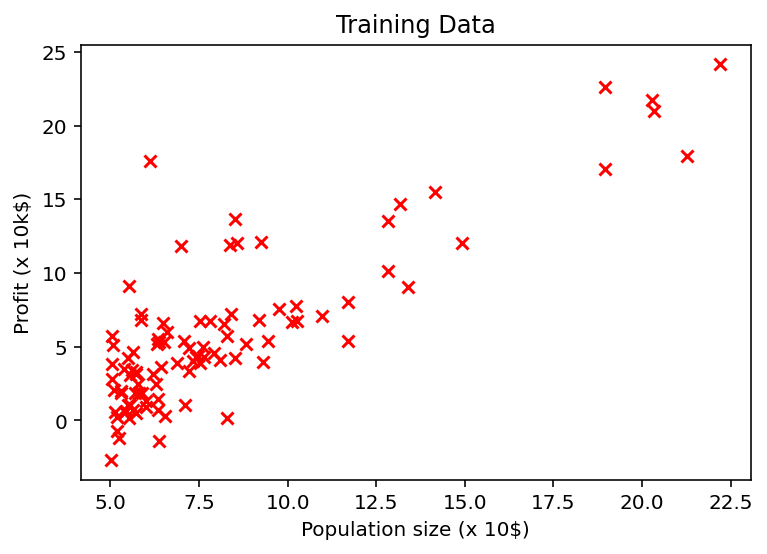

In [114]:
x_train = data[:,0]
y_train = data[:,1]

plt.scatter(x_train, y_train, marker='x', c='red')
plt.title('Training Data')
plt.xlabel('Population size (x 10$)')
plt.ylabel('Profit (x 10k$)')

plt.show()

## 3. Define the linear prediction function 
<hr>
$$
f_w(x) = w_0 + w_1 x
$$

### Vectorized implementation:
$$
f_w(x) = X w 
$$
with 
<br>
$$
X = 
\left[ 
\begin{array}{cccc}
1 & x_1 \\ 
1 & x_2 \\ 
\vdots\\
1 & x_n
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 
\end{array} 
\right]
\quad
\Rightarrow 
\quad
f_w(x) = X w  =
\left[ 
\begin{array}{cccc}
w_0 + w_1 x_1 \\ 
w_0 + w_1 x_2 \\ 
\vdots\\
w_0 + w_1 x_n
\end{array} 
\right]
$$

Implement the vectorized version of the linear predictive function.

In [115]:
# construct data matrix
X = np.array([[1.0, xt] for xt in np.array(x_train)])

# parameters vector
w = np.array([1.0, 1.0])

# predictive function definition
def f_pred(X,w): 
    
    f = np.dot(X, w)
    
    return f 

# Test predicitive function 
y_pred = f_pred(X,w)


In [116]:
X[:5, :]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [117]:
w

array([1., 1.])

In [118]:
y_pred[:5]

array([7.1101, 6.5277, 9.5186, 8.0032, 6.8598])

## 4. Define the linear regression loss 
<hr>
$$
L(w)=\frac{1}{n} \sum_{i=1}^n \ \Big( f_w(x_i) – y_i \Big)^2
$$

### Vectorized implementation:
$$
L(w)=\frac{1}{n} (Xw-y)^T(Xw-y)
$$
with 
$$
Xw=
\left[ 
\begin{array}{cccc}
w_0 + w_1 x_1 \\ 
w_0 + w_1 x_2 \\ 
\vdots\\
w_0 + w_1 x_n
\end{array} 
\right]
\quad
\textrm{ and }
\quad
y = 
\left[ 
\begin{array}{cccc}
y_1 \\ 
y_2 \\ 
\vdots\\
y_n
\end{array} 
\right]
$$

Implement the vectorized version of the linear regression loss function.

In [119]:
# loss function definition
def loss_mse(y_pred,y): 
    
    loss = (np.dot((y_pred - y).T, (y_pred - y))) / len(y)
    
    return loss


# Test loss function 
y = y_train 
y_pred = f_pred(X, w)

loss = loss_mse(y_pred,y)

In [120]:
loss

20.53304098276701

## 5. Define the gradient of the linear regression loss 
<hr>

### Vectorized implementation: Given the loss
$$
L(w)=\frac{1}{n} (Xw-y)^T(Xw-y)
$$
The gradient is given by  
$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T(Xw-y)
$$


Implement the vectorized version of the gradient of the linear regression loss function.

In [121]:
# gradient function definition
def grad_loss(y_pred,y,X):

    return (np.dot(X.T, (y_pred - y))) / len(X) * 2

# Test grad function 
y_pred = f_pred(X, w)
grad = grad_loss(y_pred,y,X)

In [122]:
grad

array([ 6.6413299 , 48.46978615])

## 6. Implement the gradient descent algorithm 
<hr>

$\bullet$ Vectorized implementation: 
$$
w^{k+1} = w^{k} - \tau  \frac{2}{n} X^T(Xw^{k}-y)
$$

### Implement the vectorized version of the gradient descent function.

### Plot the loss values $L(w^k)$ with respect to iteration $k$ the number of iterations.

Time= 0.03724098205566406 for iteration count 1000
11.631643093013956
[-0.06104373  0.80779265]


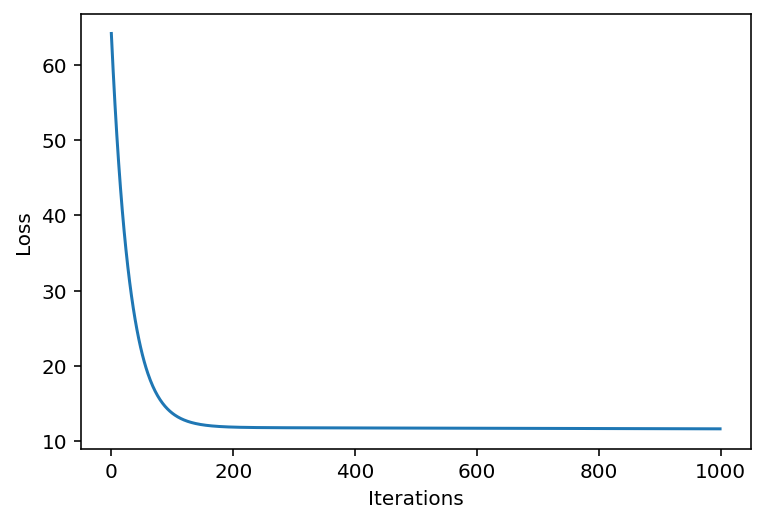

In [142]:
# gradient descent function definition
def grad_desc(X, y, w_init, tau, max_iter):

    L_iters = []# record the loss values
    w_iters = [] # record the parameter values
    w = w_init # initialization
    count_iter = 0
    
    for i in range(max_iter): # loop over the iterations
        
        y_pred = f_pred(X, w)# linear predicition function        
        grad_f = grad_loss(y_pred, y, X) # gradient of the loss
        
        if (abs(grad_f) >= 0.005).all():
            w -= tau * grad_f # update rule of gradient descent
            loss_temp = loss_mse(y_pred, y)
            L_iters.append(loss_temp) # save the current loss value 
            w_iters.append(w) # save the current w value
            count_iter += 1         
        
        else:
            break
                            
    return w, np.array(L_iters), np.array(w_iters), count_iter

# run gradient descent algorithm 
start = time.time()
w_init = np.array([0.0, 0.0])
tau = 0.0001
max_iter = 1000

w_li, L_iters, w_iters, num_iter = grad_desc(X,y,w_init,tau,max_iter)

print('Time=',time.time() - start, 'for iteration count', num_iter) # plot the computational cost
print(L_iters[-1]) # plot the last value of the loss
print(w_iters[-1, :]) # plot the last value of the parameter w 

# plot
plt.figure(2)
plt.plot(range(num_iter), L_iters) # plot the loss curve
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

## 7. Plot the linear prediction function
<hr>
$$
f_w(x) = w_0 + w_1 x
$$

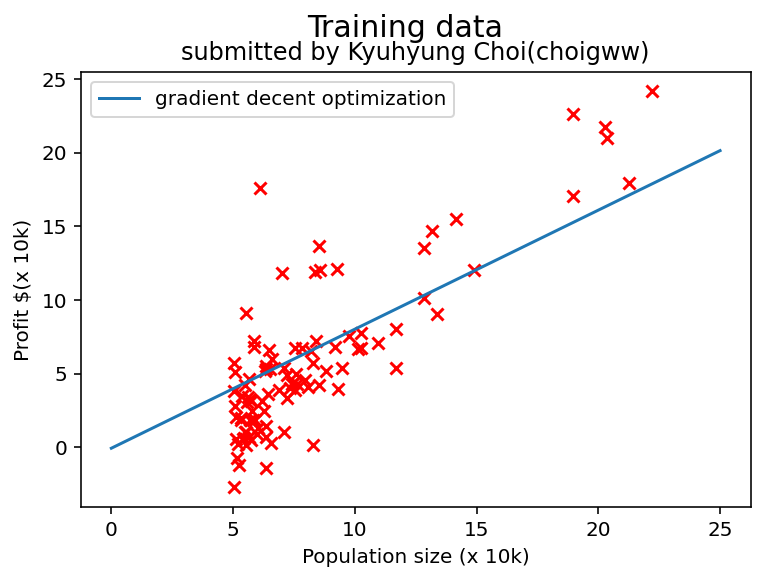

In [163]:
# linear regression model
x_pred = np.linspace(0,25,100) # define the domain of the prediction function
X_pred = [[1, x] for x in x_pred]
y_pred = f_pred(X_pred, w_iters[-1, :]) # compute the prediction values within the given domain x_pred

# plot
plt.figure(3)
plt.scatter(x_train, y_train, marker='x', c='red')
plt.plot(x_pred, y_pred)
plt.legend(['gradient decent optimization'], loc='best')
plt.title('submitted by Kyuhyung Choi(choigww)')
plt.suptitle('Training data', size=15)
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

# Final Output
##  Plot the linear prediction function superimposed on the training data. Your final submission result should be look like the following graph:

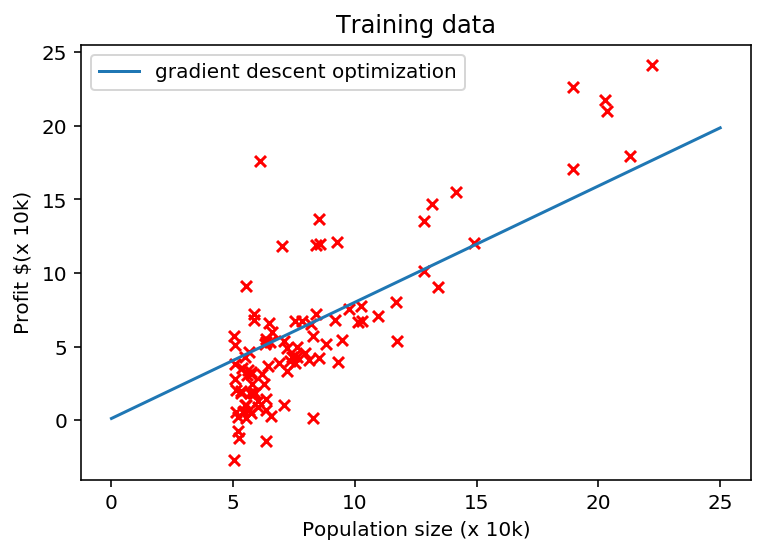